# Домашнее задание № 9. Предобученные трансформеры

### Задание 1 (8 баллов).
Дообучите 3 предобученных модели на тех же данных, что и в семинаре. Сравните качество и выберите лучшую.
Модели должны отличаться друг от друга не только параметрами ru/en/multilingual, base/large, cased/uncased. Все три выбранные модели должны работать лучше, чем бейзлайн без дообучения (т.е. если модель не работает, попробуйте другую).


In [1]:
# стандартные библиотеки
import os, re
import numpy as np
from time import time
from sklearn.model_selection import train_test_split
import pandas as pd
from collections import Counter
from string import punctuation
import matplotlib.pyplot as plt
%matplotlib inline


# tf и huggingface
import tensorflow as tf
from transformers import TFAutoModel, TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('lenta_sample.csv')
data.dropna(subset=['topic', 'text'], inplace=True)

In [3]:
data.topic.value_counts()

Из жизни             55
Наука и техника      54
Бывший СССР          54
Культура             53
Ценности             45
Дом                  45
Бизнес               44
Интернет и СМИ       44
Силовые структуры    40
Спорт                39
Россия               32
Экономика            32
Мир                  27
69-я параллель       13
Легпром              13
Библиотека           10
Крым                  7
Name: topic, dtype: int64

In [4]:
data.shape

(607, 6)

# Модель 1

In [ ]:
tokenizer_1 = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")

model_1 = TFAutoModel.from_pretrained("DeepPavlov/rubert-base-cased", from_pt=True)

C:\Users\robst\PycharmProjects\HSE_NLP\venv2\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\robst\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the 

In [ ]:
data.loc[4, 'title']

'По факту пожара на\xa0заводе в\xa0Югре заведено дело'

In [ ]:
data

,url,title,text,topic,tags,date
0,https://lenta.ru/news/2010/12/16/passports/,Московская милиция ужесточила паспортный режим,В Москве после серии массовых беспорядков на н...,Россия,Все,2010/12/16
1,https://lenta.ru/news/2014/05/19/student/,Московского студента ограбили на 6 миллионов р...,Неизвестные вынесли из квартиры московского ст...,Россия,NaN,2014/05/19
2,https://lenta.ru/news/2008/09/27/catch/,В Ставропольском крае обезврежены боевики,"В Ставропольском крае задержаны боевики, котор...",Россия,Все,2008/09/27
3,https://lenta.ru/news/2009/07/23/refuse/,Лужков отказался трудоустраивать китайцев с Че...,"Мэр Москвы Юрий Лужков заявил, что не намерен ...",Россия,Все,2009/07/23
4,https://lenta.ru/news/2012/09/29/factory/,По факту пожара на заводе в Югре заведено дело,Следственный комитет России возбудил уголовное...,Россия,Все,2012/09/29
...,...,...,...,...,...,...
602,https://lenta.ru/news/2014/09/14/pattern/,1914. Выкройки для раненых,"В дополнение к выкройкам белья для раненых, ра...",Библиотека,Первая мировая,2014/09/14
603,https://lenta.ru/news/2014/12/23/christmas/,1914. Немецкие и британские солдаты отметили п...,24 декабря в Бельгии в районе Ипра произошло н...,Библиотека,Первая мировая,2014/12/23
604,https://lenta.ru/news/2014/10/21/dobrovolec/,1914. Польский доброволец-герой,В числе поступивших в нашу армию добровольцев ...,Библиотека,Первая мировая,2014/10/21
605,https://lenta.ru/news/2014/09/18/postoffice/,1914. Письма в действующую армию на деревню де...,За последнее время на имя начальника штаба Вер...,Библиотека,Первая мировая,2014/09/18


In [ ]:
# переводим тексты в последовательности индексов
# У берта есть ограничение на максимальную длину последовательности - 512
# Для заголовков это не очень актуально, но для других данных пригодится

X = []

for text in data.title:
    ids = tokenizer_1.encode(text)

    X.append(ids[:512])

In [ ]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=512)

In [ ]:
id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = tf.keras.utils.to_categorical([label2id[label] for label in data.topic.values])

In [ ]:
X.shape

(607, 512)

In [ ]:
train_index, valid_index = train_test_split(list(range(len(X))), test_size=0.05, stratify=data.topic)

In [ ]:
X_train, y_train = X[train_index], y[train_index]
X_valid, y_valid = X[valid_index], y[valid_index]

In [ ]:
input_word_ids = tf.keras.layers.Input(shape=(512,), dtype=tf.int32,
                                     name="input_ids")
output = model_1(input_word_ids)
drop = tf.keras.layers.Dropout(0.1)(output[0][:, 0])
dense = tf.keras.layers.Dense(y.shape[1], activation='softmax')(drop)

model_1_clf = tf.keras.Model(inputs=input_word_ids, outputs=dense)

model_1_clf.compile(tf.optimizers.Adam(learning_rate=2e-6),
                  loss='categorical_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.RecallAtPrecision(0.80, name='rec_prec')])

In [ ]:
model_1_clf.fit(X_train, y_train,
          validation_data=(X_valid, y_valid),
          batch_size=4,
         epochs=20)

Epoch 1/20


144/144 [==============================] - 124s 543ms/step - loss: 2.9215 - accuracy: 0.0642 - rec_prec: 0.0000e+00 - val_loss: 2.7457 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 2/20
144/144 [==============================] - 73s 508ms/step - loss: 2.8350 - accuracy: 0.0642 - rec_prec: 0.0000e+00 - val_loss: 2.7765 - val_accuracy: 0.0645 - val_rec_prec: 0.0000e+00
Epoch 3/20
144/144 [==============================] - 72s 501ms/step - loss: 2.8414 - accuracy: 0.0816 - rec_prec: 0.0000e+00 - val_loss: 2.7465 - val_accuracy: 0.0323 - val_rec_prec: 0.0000e+00
Epoch 4/20
144/144 [==============================] - 74s 513ms/step - loss: 2.7803 - accuracy: 0.0816 - rec_prec: 0.0000e+00 - val_loss: 2.7702 - val_accuracy: 0.0645 - val_rec_prec: 0.0000e+00
Epoch 5/20
144/144 [==============================] - 75s 524ms/step - loss: 2.7952 - accuracy: 0.0694 - rec_prec: 0.0000e+00 - val_loss: 2.7449 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 6/20
144/144 [===============

dict_keys(['loss', 'accuracy', 'rec_prec', 'val_loss', 'val_accuracy', 'val_rec_prec'])


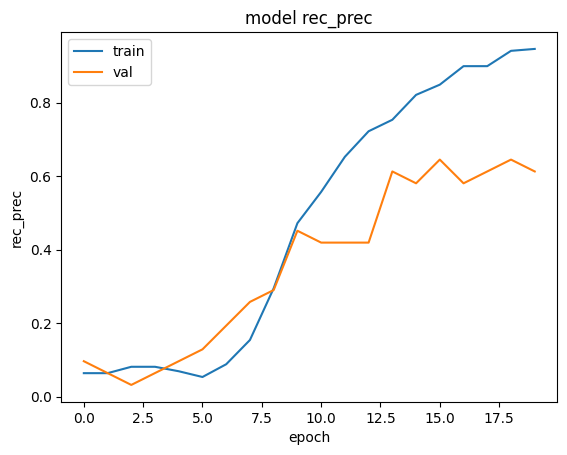

In [ ]:
print(model_1_clf.history.history.keys())
plt.plot(model_1_clf.history.history['accuracy'])
plt.plot(model_1_clf.history.history['val_accuracy'])
plt.title('model rec_prec')
plt.ylabel('rec_prec')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
pred = model_1_clf.predict(X_valid, batch_size=5).argmax(1)

7/7 [==============================] - 4s 198ms/step


In [ ]:
print(classification_report(y_valid.argmax(1), pred, labels=list(range(len(label2id))),
                            target_names=list(label2id), zero_division=0))

                   precision    recall  f1-score   support

           Россия       0.50      0.50      0.50         2
              Дом       0.50      0.50      0.50         2
Силовые структуры       0.50      0.50      0.50         2
   69-я параллель       1.00      1.00      1.00         1
  Наука и техника       0.67      0.67      0.67         3
         Из жизни       1.00      0.33      0.50         3
      Бывший СССР       0.40      0.67      0.50         3
           Бизнес       1.00      1.00      1.00         2
            Спорт       1.00      1.00      1.00         2
             Крым       0.00      0.00      0.00         0
       Библиотека       0.00      0.00      0.00         0
        Экономика       1.00      1.00      1.00         2
   Интернет и СМИ       0.33      0.50      0.40         2
         Культура       0.33      0.33      0.33         3
              Мир       0.00      0.00      0.00         1
          Легпром       0.00      0.00      0.00       

# Не совсем понял про бейзлайн

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

tokenizer_1 = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model_base_1 = TFAutoModelForSequenceClassification.from_pretrained("DeepPavlov/rubert-base-cased", from_pt=True)

# Токенизация текстов из колонки title
X = []

for text in data.title:
    ids = tokenizer_1.encode(text)
    X.append(ids[:512])

X = tf.keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=512)

id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = tf.keras.utils.to_categorical([label2id[label] for label in data.topic.values])

# Разделение данных на обучающую и валидационную выборки
train_index, valid_index = train_test_split(list(range(len(X))), test_size=0.05, stratify=data.topic)
X_train, y_train = X[train_index], y[train_index]
X_valid, y_valid = X[valid_index], y[valid_index]

# Получение предсказаний модели на валидационных данных
logits = model_base_1(X_valid).logits
pred_base = tf.nn.softmax(logits, axis=-1).numpy().argmax(axis=-1)

# Вычисление метрик качества
print(classification_report(y_valid.argmax(axis=-1), pred_base, labels=list(range(len(label2id))),
                            target_names=list(label2id), zero_division=0))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


                   precision    recall  f1-score   support

           Россия       0.06      1.00      0.12         2
         Ценности       0.00      0.00      0.00         2
        Экономика       0.00      0.00      0.00         2
              Мир       0.00      0.00      0.00         1
   69-я параллель       0.00      0.00      0.00         1
Силовые структуры       0.00      0.00      0.00         2
      Бывший СССР       0.00      0.00      0.00         3
   Интернет и СМИ       0.00      0.00      0.00         2
         Из жизни       0.00      0.00      0.00         3
          Легпром       0.00      0.00      0.00         1
         Культура       0.00      0.00      0.00         3
  Наука и техника       0.00      0.00      0.00         3
            Спорт       0.00      0.00      0.00         2
              Дом       0.00      0.00      0.00         2
           Бизнес       0.00      0.00      0.00         2
             Крым       0.00      0.00      0.00       

# Модель 2

In [6]:
tokenizer_2 = AutoTokenizer.from_pretrained("ai-forever/ruBert-base")
model_2 = TFAutoModel.from_pretrained("ai-forever/ruBert-base", from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint

In [7]:
# переводим тексты в последовательности индексов
# У берта есть ограничение на максимальную длину последовательности - 512
# Для заголовков это не очень актуально, но для других данных пригодится

X = []

for text in data.title:
    ids = tokenizer_2.encode(text)

    X.append(ids[:512])

In [8]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=512)

In [9]:
id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = tf.keras.utils.to_categorical([label2id[label] for label in data.topic.values])

In [10]:
train_index, valid_index = train_test_split(list(range(len(X))), test_size=0.05, stratify=data.topic)

In [11]:
X_train, y_train = X[train_index], y[train_index]
X_valid, y_valid = X[valid_index], y[valid_index]

In [12]:
input_word_ids = tf.keras.layers.Input(shape=(512,), dtype=tf.int32,
                                     name="input_ids")
output = model_2(input_word_ids)
drop = tf.keras.layers.Dropout(0.1)(output[0][:, 0])
dense = tf.keras.layers.Dense(y.shape[1], activation='softmax')(drop)

model_2_clf = tf.keras.Model(inputs=input_word_ids, outputs=dense)

model_2_clf.compile(tf.optimizers.Adam(learning_rate=2e-6),
                  loss='categorical_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.RecallAtPrecision(0.80, name='rec_prec')])

In [13]:
model_2_clf.fit(X_train, y_train,
          validation_data=(X_valid, y_valid),
          batch_size=4,
         epochs=20)

Epoch 1/20


144/144 [==============================] - 149s 575ms/step - loss: 2.8872 - accuracy: 0.0660 - rec_prec: 0.0000e+00 - val_loss: 2.7980 - val_accuracy: 0.0645 - val_rec_prec: 0.0000e+00
Epoch 2/20
144/144 [==============================] - 77s 535ms/step - loss: 2.8358 - accuracy: 0.0816 - rec_prec: 0.0000e+00 - val_loss: 2.7156 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 3/20
144/144 [==============================] - 77s 534ms/step - loss: 2.8032 - accuracy: 0.0816 - rec_prec: 0.0000e+00 - val_loss: 2.7007 - val_accuracy: 0.0645 - val_rec_prec: 0.0000e+00
Epoch 4/20
144/144 [==============================] - 77s 534ms/step - loss: 2.8111 - accuracy: 0.0677 - rec_prec: 0.0000e+00 - val_loss: 2.6932 - val_accuracy: 0.0645 - val_rec_prec: 0.0000e+00
Epoch 5/20
144/144 [==============================] - 76s 526ms/step - loss: 2.7346 - accuracy: 0.1042 - rec_prec: 0.0017 - val_loss: 2.7749 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 6/20
144/144 [===================

dict_keys(['loss', 'accuracy', 'rec_prec', 'val_loss', 'val_accuracy', 'val_rec_prec'])


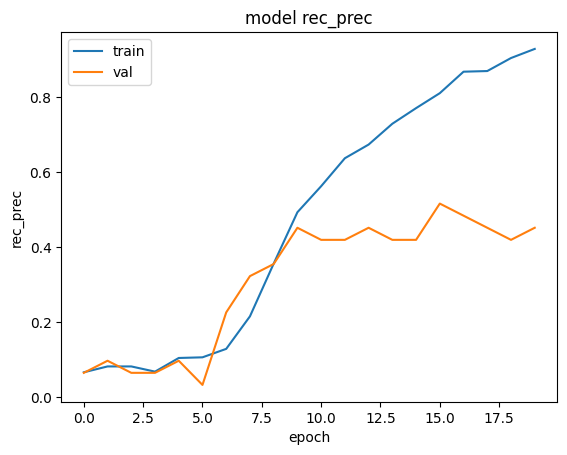

In [14]:
print(model_2_clf.history.history.keys())
plt.plot(model_2_clf.history.history['accuracy'])
plt.plot(model_2_clf.history.history['val_accuracy'])
plt.title('model rec_prec')
plt.ylabel('rec_prec')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [15]:
pred = model_2_clf.predict(X_valid, batch_size=5).argmax(1)

7/7 [==============================] - 5s 194ms/step


In [17]:
print(classification_report(y_valid.argmax(1), pred, labels=list(range(len(label2id))),
                            target_names=list(label2id), zero_division=0))

                   precision    recall  f1-score   support

              Дом       0.50      0.50      0.50         2
        Экономика       0.00      0.00      0.00         2
            Спорт       1.00      1.00      1.00         2
      Бывший СССР       0.50      0.67      0.57         3
         Ценности       0.50      0.50      0.50         2
  Наука и техника       0.50      0.33      0.40         3
          Легпром       0.00      0.00      0.00         1
       Библиотека       0.00      0.00      0.00         0
           Бизнес       0.25      0.50      0.33         2
           Россия       0.33      0.50      0.40         2
         Из жизни       1.00      0.67      0.80         3
         Культура       1.00      0.33      0.50         3
              Мир       0.00      0.00      0.00         1
   Интернет и СМИ       0.33      0.50      0.40         2
             Крым       0.00      0.00      0.00         0
Силовые структуры       0.33      0.50      0.40       

# Модель 3


In [6]:
tokenizer_3 = tokenizer = AutoTokenizer.from_pretrained("Geotrend/bert-base-ru-cased")
model_3 = TFAutoModel.from_pretrained('Geotrend/bert-base-ru-cased')

C:\Users\robst\anaconda3\envs\tf\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\robst\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight'

In [7]:
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

GPU is available


In [8]:
# переводим тексты в последовательности индексов
# У берта есть ограничение на максимальную длину последовательности - 512
# Для заголовков это не очень актуально, но для других данных пригодится

X = []

for text in data.title:
    ids = tokenizer_3.encode(text)

    X.append(ids[:512])

In [9]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, padding='post', maxlen=512)

In [10]:
id2label = {i:label for i, label in enumerate(set(data.topic.values))}
label2id = {l:i for i, l in id2label.items()}

y = tf.keras.utils.to_categorical([label2id[label] for label in data.topic.values])

In [11]:
train_index, valid_index = train_test_split(list(range(len(X))), test_size=0.05, stratify=data.topic)

In [12]:
X_train, y_train = X[train_index], y[train_index]
X_valid, y_valid = X[valid_index], y[valid_index]

In [13]:
input_word_ids = tf.keras.layers.Input(shape=(512,), dtype=tf.int32,
                                     name="input_ids")
output = model_3(input_word_ids)
drop = tf.keras.layers.Dropout(0.1)(output[0][:, 0])
dense = tf.keras.layers.Dense(y.shape[1], activation='softmax')(drop)

model_3_clf = tf.keras.Model(inputs=input_word_ids, outputs=dense)

model_3_clf.compile(tf.optimizers.Adam(learning_rate=2e-6),
                  loss='categorical_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.RecallAtPrecision(0.80, name='rec_prec')])

In [14]:
model_3_clf.fit(X_train, y_train,
          validation_data=(X_valid, y_valid),
          batch_size=4,
         epochs=20)

Epoch 1/20
144/144 [==============================] - 37s 217ms/step - loss: 2.8591 - accuracy: 0.0642 - rec_prec: 0.0000e+00 - val_loss: 2.7779 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 2/20
144/144 [==============================] - 30s 206ms/step - loss: 2.7959 - accuracy: 0.0833 - rec_prec: 0.0000e+00 - val_loss: 2.6939 - val_accuracy: 0.0968 - val_rec_prec: 0.0000e+00
Epoch 3/20
144/144 [==============================] - 29s 199ms/step - loss: 2.7609 - accuracy: 0.1042 - rec_prec: 0.0000e+00 - val_loss: 2.6743 - val_accuracy: 0.1290 - val_rec_prec: 0.0000e+00
Epoch 4/20
144/144 [==============================] - 29s 202ms/step - loss: 2.6873 - accuracy: 0.1285 - rec_prec: 0.0017 - val_loss: 2.5852 - val_accuracy: 0.2903 - val_rec_prec: 0.0000e+00
Epoch 5/20
144/144 [==============================] - 29s 199ms/step - loss: 2.5560 - accuracy: 0.2049 - rec_prec: 0.0017 - val_loss: 2.3641 - val_accuracy: 0.1935 - val_rec_prec: 0.0323
Epoch 6/20
144/144 [=================

dict_keys(['loss', 'accuracy', 'rec_prec', 'val_loss', 'val_accuracy', 'val_rec_prec'])


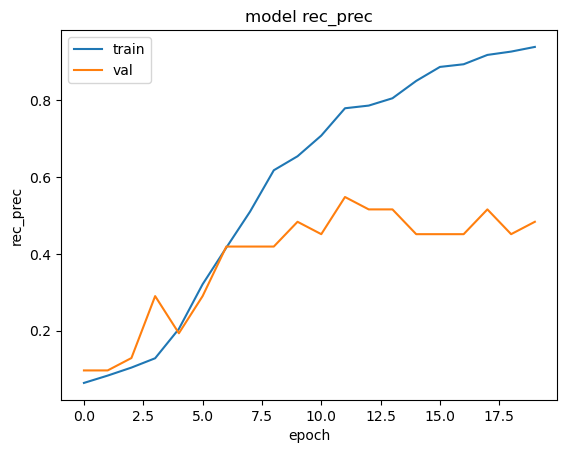

In [15]:
print(model_3_clf.history.history.keys())
plt.plot(model_3_clf.history.history['accuracy'])
plt.plot(model_3_clf.history.history['val_accuracy'])
plt.title('model rec_prec')
plt.ylabel('rec_prec')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
pred = model_3_clf.predict(X_valid, batch_size=5).argmax(1)

7/7 [==============================] - 5s 111ms/step


In [17]:
print(classification_report(y_valid.argmax(1), pred, labels=list(range(len(label2id))),
                            target_names=list(label2id), zero_division=0))

                   precision    recall  f1-score   support

   69-я параллель       0.00      0.00      0.00         1
         Из жизни       1.00      1.00      1.00         3
         Культура       1.00      0.67      0.80         3
              Мир       0.33      1.00      0.50         1
      Бывший СССР       0.25      0.33      0.29         3
         Ценности       1.00      0.50      0.67         2
            Спорт       1.00      0.50      0.67         2
           Россия       0.50      0.50      0.50         2
              Дом       0.00      0.00      0.00         2
          Легпром       0.00      0.00      0.00         1
       Библиотека       0.00      0.00      0.00         0
Силовые структуры       0.00      0.00      0.00         2
           Бизнес       0.29      1.00      0.44         2
        Экономика       0.50      0.50      0.50         2
   Интернет и СМИ       0.00      0.00      0.00         2
  Наука и техника       0.67      0.67      0.67       

### Задание  2 (2 балла)

Ответьте на следующие вопросы (напишите хотя бы по несколько предложений):

1) Чем ROBERTA отличается от BERT? В какой статье описана ROBERTA? https://arxiv.org/abs/1907.11692 "RoBERTa: A Robustly Optimized BERT Pretraining Approach"
    RoBERTa обучалась на гораздо большем наборе данных. (Более длительное время обучения и больший объем обучающих данных (в 10 раз больше — от 16GB к 160GB))
    RoBERTa использует более эффективную процедуру обучения. (Размер батча от 256 к 8000 и больший словарь — от 30k to 50k)
    RoBERTa использует байтовый BPE в качестве токенизатора (похоже на GPT-2). (В качестве входных данных используются более длинные последовательности, но RoBERTa по-прежнему имеет ограничение на максимальное количество
    токенов — 512, как и у BERT)
    RoBERTa использует другую схему предварительного обучения. (Динамическое маскирование позволяет маскирующей схеме меняться при каждой подаче последовательности на модель. Отличие от BERT в том, что везде используется одна
    и та же маскирующая схема)
2) Чем модель T5 отличается от ROBERTA/BERT?
    T5 использует Text-To-Text формат для всех задач обработки естественного языка. (Входные и выходные данные всегда представлены в виде текстовых строк.)
    Также T5 позволяет использовать одну и ту же модель, функцию потерь и гиперпараметры для любой задачи обработки естественного языка, включая машинный перевод, документное резюмирование, ответы на вопросы и задачи
    классификации (например, анализ тональности).
    T5 может предсказывать несколько слов, в то время как BERT предсказывает цель, состоящую из одного слова (маскировка одного токена).